In this script, the provided "telco.csv" dataset is analysed with linear regression and decision tree methods. I choose such methods due easily validality the model using statistical tests. Trees can be visualised, which makes them easy to interpret.

First of all, the loading the required libraties for the analysis is necessary.

In [32]:
# For storing and manipulating data
import pandas as pd

# For visualisation and plotting manners
import matplotlib.pyplot as plt 
import pydot
import seaborn as sns

# For array and mathematical exercises
import numpy as np 

# For file modification during the output handling
import os

# Collection of various predictive analysis techniques
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

In [33]:
#Loading the data from 'telco.csv' into a pandas Dataframe object
df = pd.read_csv("telco.csv")

# Checking the types inside the columns.
# There is not non-numeric data, hence no need for type conversion
# Each column containes 1000 enties, therefore, the dataset is complete
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
region      1000 non-null int64
tenure      1000 non-null int64
age         1000 non-null int64
marital     1000 non-null int64
address     1000 non-null int64
income      1000 non-null float64
ed          1000 non-null int64
employ      1000 non-null int64
retire      1000 non-null float64
gender      1000 non-null int64
reside      1000 non-null int64
tollfree    1000 non-null int64
equip       1000 non-null int64
callcard    1000 non-null int64
wireless    1000 non-null int64
longmon     1000 non-null float64
tollmon     1000 non-null float64
equipmon    1000 non-null float64
cardmon     1000 non-null float64
wiremon     1000 non-null float64
longten     1000 non-null float64
tollten     1000 non-null float64
equipten    1000 non-null float64
cardten     1000 non-null float64
wireten     1000 non-null float64
multline    1000 non-null int64
voice       1000 non-null int64
pager 

Average: 0.1919248079940636


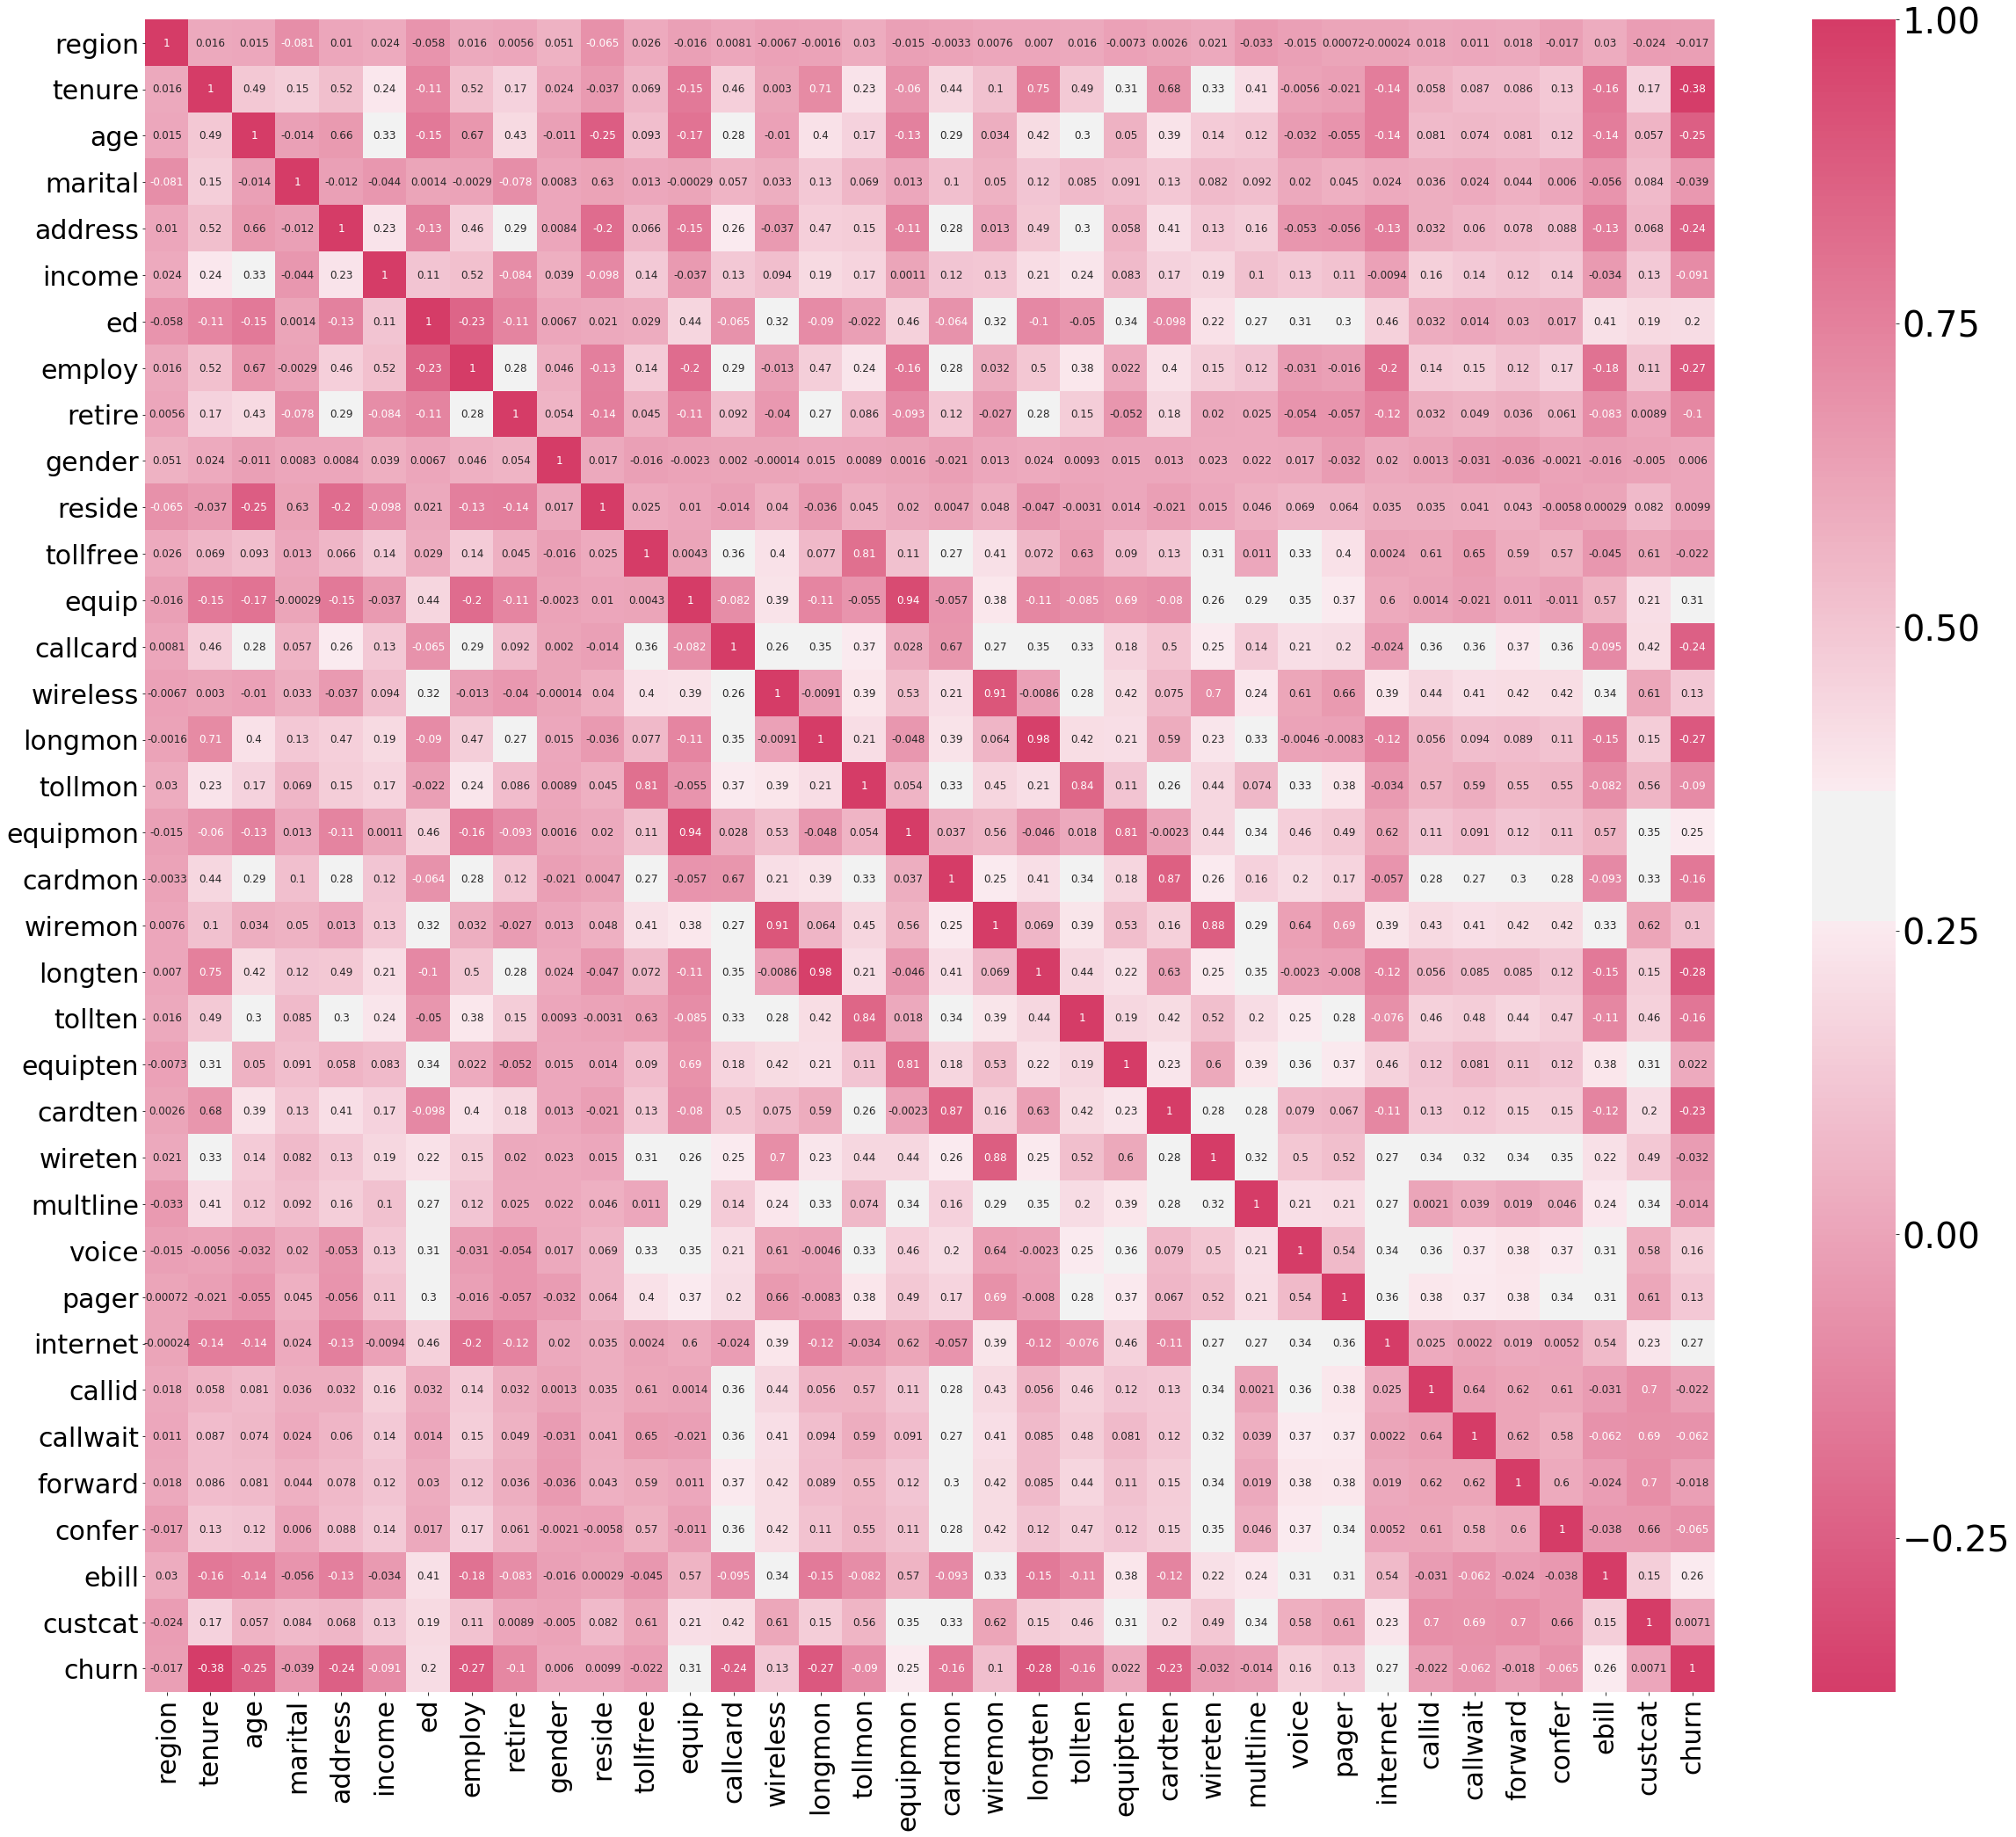

In [34]:
# Calculating the cross-correlations between every possible column combination
corr = df.corr()

# Setting up the colorbar and colormap for the heatmap.
cmap = sns.diverging_palette(0, 1, sep=20, as_cmap=True)

# Creating the heatmap
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12},
                cmap = cmap)

# Further formatting
heat_map=plt.gcf()
heat_map.set_size_inches(40,35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=40)

# Saving the diagram into hard-drive
if os.path.isfile("heatmap.pdf"):
   os.remove("heatmap.pdf") 
plt.savefig("heatmap.pdf", dpi = 200)

# Showing the average of the heat-map
print("Average:", np.average(corr.values))
plt.show()

The average of linear correlation coefficients is 0.1919. Thus, based on this heat-map, no strong correlation pattern could be seen. 

In [35]:
# Splitting the raw data into training and test segments
train, test = train_test_split(df, test_size = 0.25)

train_y = train['churn']
test_y = test['churn']
 
train_x = train
train_x.pop('churn')
test_x = test
test_x.pop('churn')

739    0
446    0
735    0
478    1
633    1
907    0
844    0
386    0
753    0
519    0
270    0
322    1
595    0
48     1
599    1
940    0
469    1
305    1
490    1
818    0
613    0
630    0
649    0
648    0
140    0
549    1
349    0
334    0
539    0
156    0
      ..
930    0
787    0
462    0
411    1
937    0
388    0
474    0
198    0
870    1
856    0
514    1
816    1
984    0
96     0
127    1
634    0
589    0
398    0
338    0
74     0
874    0
173    1
79     0
890    0
509    0
328    1
974    0
892    0
424    0
866    0
Name: churn, Length: 250, dtype: int64

Intercept: [-0.05450845]
Regression: [[-1.12567894e-01 -1.55720862e-02 -1.04910602e-03  5.64980546e-01
  -1.15270753e-02  1.67666410e-04  9.20761844e-02 -3.33555551e-02
   6.72140245e-02  2.70027565e-01 -1.89560938e-01  3.08310930e-01
   3.45580201e-01 -7.57035797e-01 -2.83144283e-01  5.60699860e-02
  -5.06086430e-02  1.21578027e-02  3.50824286e-02  2.66998844e-02
  -1.62748734e-03  9.84771886e-04 -2.09289269e-04 -3.15132217e-04
  -4.33442143e-04 -1.52376080e-01  5.31606811e-01 -5.19775647e-02
   5.77118487e-01  9.74077909e-02 -2.29836850e-01  3.67849562e-01
  -1.93087111e-03  1.20726721e-01 -2.00063913e-01]]
Accuracy of logistic regression classifier on test set: 0.75
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       186
           1       0.53      0.31      0.39        64

   micro avg       0.75      0.75      0.75       250
   macro avg       0.66      0.61      0.62       250
weighted avg       0.72      0.75      0.73       

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

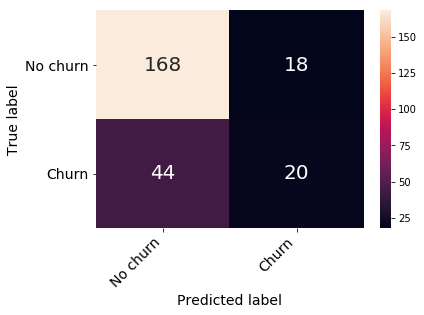

In [36]:
# Loading the class of LogisticRegression for the analysis and applying the training dataset
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)

# Predict class labels for samples in test_x.
test_y_pred = logisticRegr.predict(test_x)

# Compute confusion matrix to evaluate the accuracy of a classification
confusion_matrix = confusion_matrix(test_y, test_y_pred)

# Printing the values of coefficient of the features in the decision function
# and the bias (intercept) added to the decision function. 
# Furthermore, providing mean accuracy on the given test data and labels.
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))

# Construct a text report showing the main classification metrics in the following metrics:
# Precision: ratio of correctly predicted positive observations to the total predicted positive observations
# Recall: ratio of correctly predicted positive observations to the all observations in actual class
# f1-score: the weighted average of Precision and Recall
# Micro average: averaging the total true positives, false negatives and false positives
# Macro average: averaging the unweighted mean per label 
# Weighted average: averaging the support-weighted mean per label
print(classification_report(test_y, test_y_pred))

# Plotting the confusion matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")

# Further formatting
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

We got 76% classification accuracy from the logistic regression classifier. Out of the 250 segments of the training dataset, 189 provided True Positive or True Negative. The remaining 61 is False Positive (Type I error) or False Negative (Type II error).

In [37]:
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 8)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)
 
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file="tree_ref_v2.dot", 
                         feature_names = list(train_x.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  

(graph, ) = pydot.graph_from_dot_file('tree_ref_v2.dot')

# Write graph to a png file
graph.write_png('tree_ref_v2.png')

In [38]:
# Providing accuracy test on the decision tree method
test_y_pred_dt = decisionTree.predict(test_x)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))

Accuracy of decision tree classifier on test set: 0.73


According to the decision tree, the most important feature to describe churn is the tenure column. 330 of the test dataset has lower tenure shorter than 30.5 (months?), while 420 samples have been the costumer longer than that. On the short term, 178 of them churned and 152 still the costumer of the company (this in nearly 50%-50%). On the long term, 363 of 420 remained the costumer of the company and only 57 left. Other important features are the equip, age, ebill and cardmon.